# Parte 3 - Lab3 Modelacion y Simulacion

- Marco Jurado 20308
- Cristian Aguirre 20231
- Diego Cordova 20212

### Task 1

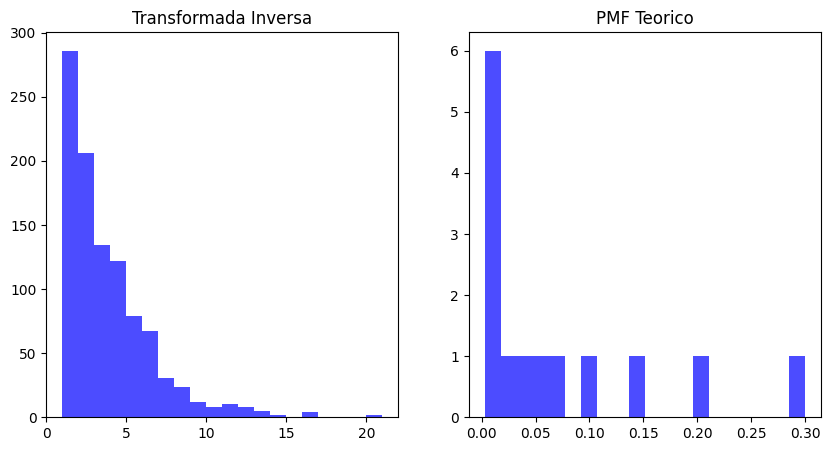

In [1]:
import numpy as np
from scipy.stats import geom
import matplotlib.pyplot as plt

p = 0.3

# Transformada inversa
U = np.random.uniform(0, 1, size=1000)
sample = [int(np.ceil(np.log(1 - u) / np.log(1 - p))) for u in U]

# PMF Teorico
values = np.arange(1, 15)
pmf_teorico = geom.pmf(values, p)

# Trazo de histogramas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(sample, bins=20, alpha=0.7, color='blue')
ax1.set_title('Transformada Inversa')

ax2.hist(pmf_teorico, bins=20, alpha=0.7, color='blue')
ax2.set_title('PMF Teorico')
plt.show()

### Task2

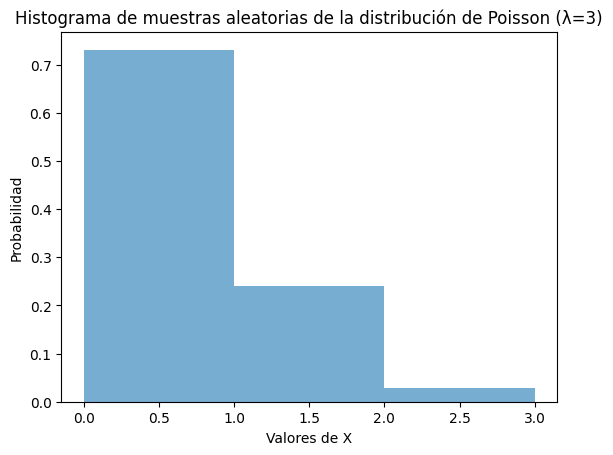

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

lambda_ = 3

geom_samples = np.random.poisson(1/lambda_, size=1000)
poisson_samples = geom_samples[geom_samples <= lambda_]

# Trazar el histograma de las muestras generadas
plt.hist(poisson_samples, bins=np.arange(0, max(poisson_samples) + 1), density=True, alpha=0.6)
plt.xlabel('Valores de X')
plt.ylabel('Probabilidad')
plt.title('Histograma de muestras aleatorias de la distribución de Poisson (λ=3)')
plt.show()


C:\Users\Diego-CB\AppData\Local\Temp\ipykernel_15440\2733311773.py:6: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.exp(-3) * (3 ** k) / np.math.factorial(k)


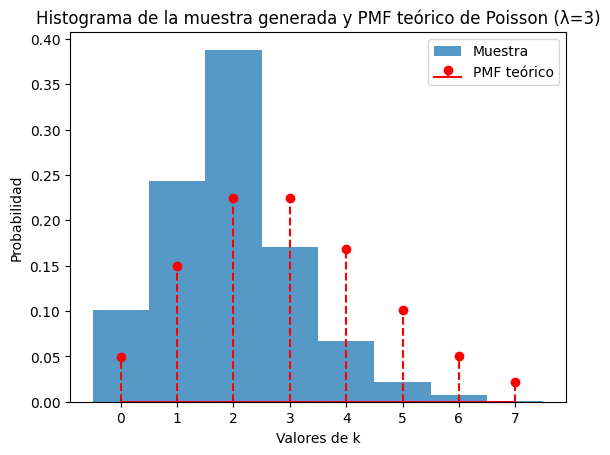

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Función de la distribución de Poisson con λ = 3
def poisson_pmf(k):
    return np.exp(-3) * (3 ** k) / np.math.factorial(k)

# Función de la distribución exponencial con β = 1
def exponential_pdf(x):
    return np.exp(-x)

# Función de cálculo de la constante C
def calculate_C():
    k = 3
    return poisson_pmf(k) / (3 * np.exp(-3) / 2)

# Tamaño de la muestra deseada
sample_size = 1000

# Generar la muestra utilizando el método de rechazo
sample = []
C = calculate_C()

while len(sample) < sample_size:
    x = np.random.exponential(scale=1)
    u = np.random.uniform()
    z = poisson_pmf(int(x)) / (C * exponential_pdf(x))

    if u <= z:
        sample.append(int(x))

# Graficar el histograma de la muestra generada
plt.hist(sample, bins=np.arange(-0.5, max(sample) + 1.5, 1), density=True, alpha=0.75, label="Muestra")
k_values = np.arange(0, max(sample) + 1)
pmf_values = [poisson_pmf(k) for k in k_values]
plt.stem(k_values, pmf_values, linefmt='r--', markerfmt='ro', basefmt='r', label="PMF teórico")
plt.xlabel("Valores de k")
plt.ylabel("Probabilidad")
plt.legend()
plt.title("Histograma de la muestra generada y PMF teórico de Poisson (λ=3)")
plt.show()


### Tasks 3

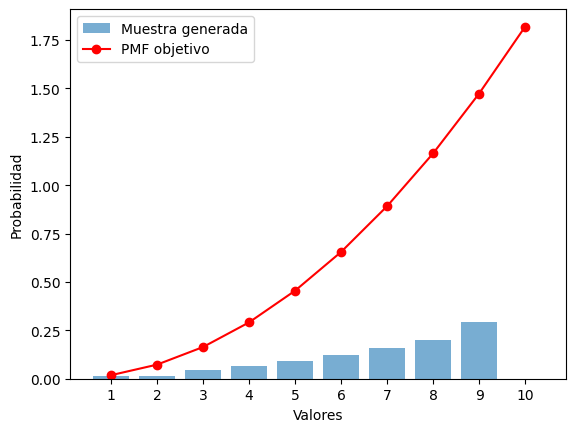

In [11]:
import random

# Función objetivo: f(x) = (x**2) / 55
target = lambda x: (x**2) / 55

# Función de propuesta: Distribución uniforme discreta en el rango de 1 a 10
U = lambda: np.random.uniform(1, 10)

# Cálculo de la constante C
C = max(target(x) / (1/10) for x in range(1, 11))

# Método de aceptación-rechazo
def acceptance_rechazo(sample_size):
    samples = []
    while len(samples) < sample_size:
        x = U()
        u = random.random()
        if u <= target(x) / (C * (1/10)):
            samples.append(x)
    return samples

random_sample = acceptance_rechazo(1000)

# Histograma de la muestra generada
import matplotlib.pyplot as plt

plt.hist(random_sample, bins=range(1, 12), density=True, align='left', rwidth=0.8, alpha=0.6, label='Muestra generada')
plt.plot(range(1, 11), [target(x) for x in range(1, 11)], 'ro-', label='PMF objetivo')
plt.xticks(range(1, 11))
plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.legend()
plt.show()
